# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [170]:
import pandas as pd
import numpy as np
iris=pd.read_csv("C:\\Users\\shanmugapriya.p\\Downloads\\iris.csv")
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
49,50,5.0,3.3,1.4,0.2,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
32,33,5.2,4.1,1.5,0.1,Iris-setosa
140,141,6.7,3.1,5.6,2.4,Iris-virginica


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [171]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Fill missing values with median of that particular column

In [189]:
SL=iris.loc[:,"SepalLengthCm"].median()
SW=iris.loc[:,"SepalWidthCm"].median()
PL=iris.loc[:,"PetalLengthCm"].median()
PW=iris.loc[:,"PetalWidthCm"].median()
print("SL=",SL)
print("SW=",SW)
print("PL=",PL)
print("PW=",PW)
iris['SepalLengthCm']=iris['SepalLengthCm'].fillna(SL)
iris['SepalWidthCm']=iris['SepalWidthCm'].fillna(SW)
iris['PetalLengthCm']=iris['PetalLengthCm'].fillna(PL)
iris['PetalWidthCm']=iris['PetalWidthCm'].fillna(PW)

SL= 5.8
SW= 3.0
PL= 4.35
PW= 1.3


In [169]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [173]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
#iris.iloc[:,5] = le.fit_transform(iris.iloc[:,5]).astype('int')
iris['Species']=le.fit_transform(iris["Species"])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [174]:
iris.corr()
iris[iris.columns[1:]].corr()['Species'][:]

SepalLengthCm    0.775061
SepalWidthCm    -0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
Species          1.000000
Name: Species, dtype: float64

In [175]:
iris.corr()
cor_matrix=iris.corr()
print(cor_matrix)



                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.702734     -0.392693       0.872346   
SepalLengthCm  0.702734       1.000000     -0.109369       0.871120   
SepalWidthCm  -0.392693      -0.109369      1.000000      -0.420713   
PetalLengthCm  0.872346       0.871120     -0.420713       1.000000   
PetalWidthCm   0.890676       0.815986     -0.356510       0.962043   
Species        0.942753       0.775061     -0.417318       0.944477   

               PetalWidthCm   Species  
Id                 0.890676  0.942753  
SepalLengthCm      0.815986  0.775061  
SepalWidthCm      -0.356510 -0.417318  
PetalLengthCm      0.962043  0.944477  
PetalWidthCm       1.000000  0.952513  
Species            0.952513  1.000000  


In [176]:
cor_matrix1 = cor_matrix["Species"].to_dict()


drop_columns=[]
for key in cor_matrix1:
    if cor_matrix1.get(key)>= -0.1 and cor_matrix1.get(key)<= 0.1:drop_columns.append(key)
        
print(drop_columns)
iris.drop(drop_columns,axis=1,inplace=True)

[]


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [177]:
iris.var()
iris.loc[:,iris.var()>0.1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

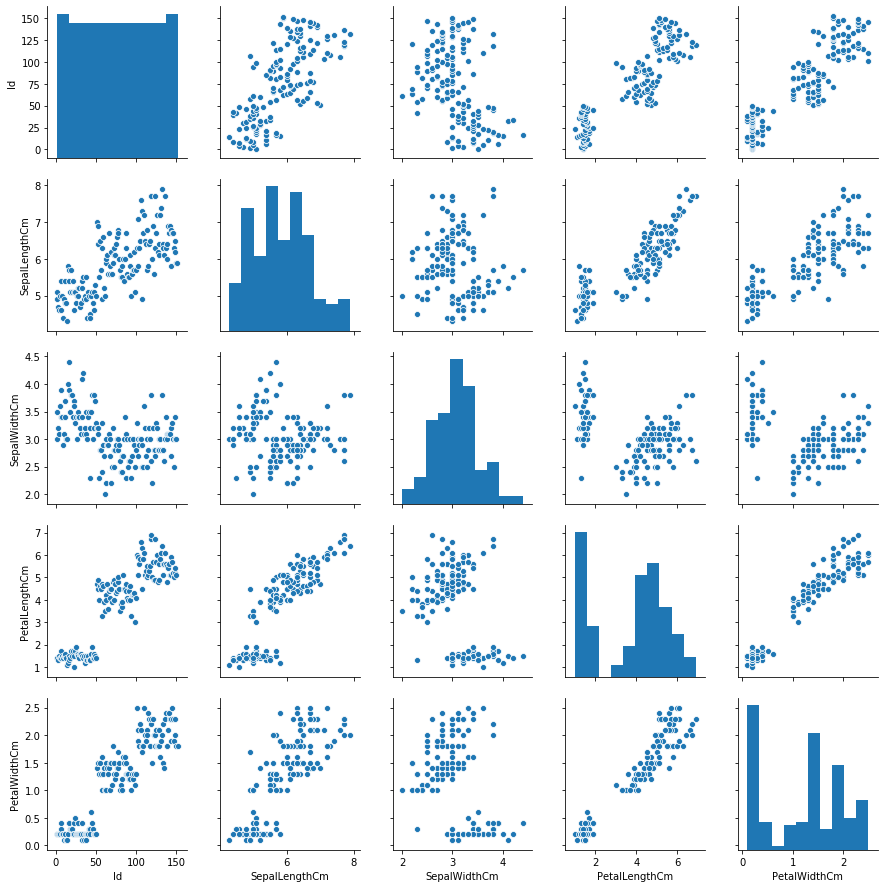

In [69]:
import seaborn as sns
g = sns.pairplot(iris)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [178]:
from sklearn.model_selection import train_test_split
x=iris.drop(["Species","Id"],axis=1)
y=iris["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
print("testset=",len(test))
print("trainset=",len(train))
print(x_train.shape)
print(y_train.shape)

testset= 31
trainset= 121
(121, 4)
(121,)


## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [179]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [3,5,9]:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(accuracy_score(y_test,y_pred))

0.9354838709677419
0.967741935483871
0.9032258064516129


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [185]:
ac_scores=[]
for k in range(1,20,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    ac_scores.append((score,k))
print("Optimal number of neighbors is {}".format(max(ac_scores)) )    

Optimal number of neighbors is (0.967741935483871, 5)


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

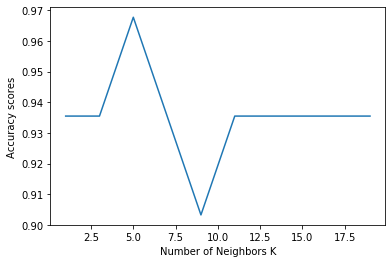

In [188]:
import matplotlib.pyplot as plt
score,k=zip(*ac_scores)
plt.plot(k,score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy scores')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [103]:
import pandas as pd
import numpy as np
bc=pd.read_csv("C:\\Users\\shanmugapriya.p\\Downloads\\bc2.csv")

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [104]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [105]:
bc.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [109]:
bc.isnull()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [108]:
bc.isnull().values.any()

False

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [110]:
bc.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


### Question 5
#### Find the distribution of target variable (Class) 

#### Plot the distribution of target variable using histogram

#### Convert the datatype of Bare Nuclei to `int`

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

#### Divide the Training and Test sets in 70:30 

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.